In [1]:
import numpy as np 
import pandas as pd 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, plot_confusion_matrix, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTENC 
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, mutual_info_classif
from warnings import filterwarnings
from sklearn.inspection import permutation_importance

In [6]:
#reading data
data=pd.read_csv("BankChurners.csv")
data.drop(list(data.iloc[:,[0,-2,-1]]),inplace=True,axis=1)
data.describe().T.style.format("{0:.2f}").bar(
    subset=['mean'], align='zero').background_gradient(
    subset=['std'], cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00
Total_Amt_Chng_Q4_Q1,10127.00,0.76,0.22,0.00,0.63,0.74,0.86,3.40


In [7]:
#Changing Existing customer to 0 and Attrited Customer to 1
map={'Attrited Customer':1,"Existing Customer":0}
data["Attrition_Flag"].replace(map,inplace=True)

In [8]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#  Data Cleaning

In [11]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
data.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [13]:
col_num=data.select_dtypes(include=["int64","float64"]).columns.tolist()
col_non_num=data.select_dtypes(include=["object"]).columns.tolist()
print("Unique values in Non numeric columns are: ")
for col in col_non_num:
    print(col.title()," : ",data[col].unique())
print("\n")
print("Number of unique values in numeric columns are:")
data[col_num].nunique()

Unique values in Non numeric columns are: 
Gender  :  ['M' 'F']
Education_Level  :  ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status  :  ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category  :  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category  :  ['Blue' 'Gold' 'Silver' 'Platinum']


Number of unique values in numeric columns are:


Attrition_Flag                 2
Customer_Age                  45
Dependent_count                6
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

#  Exploratory Data Analysis

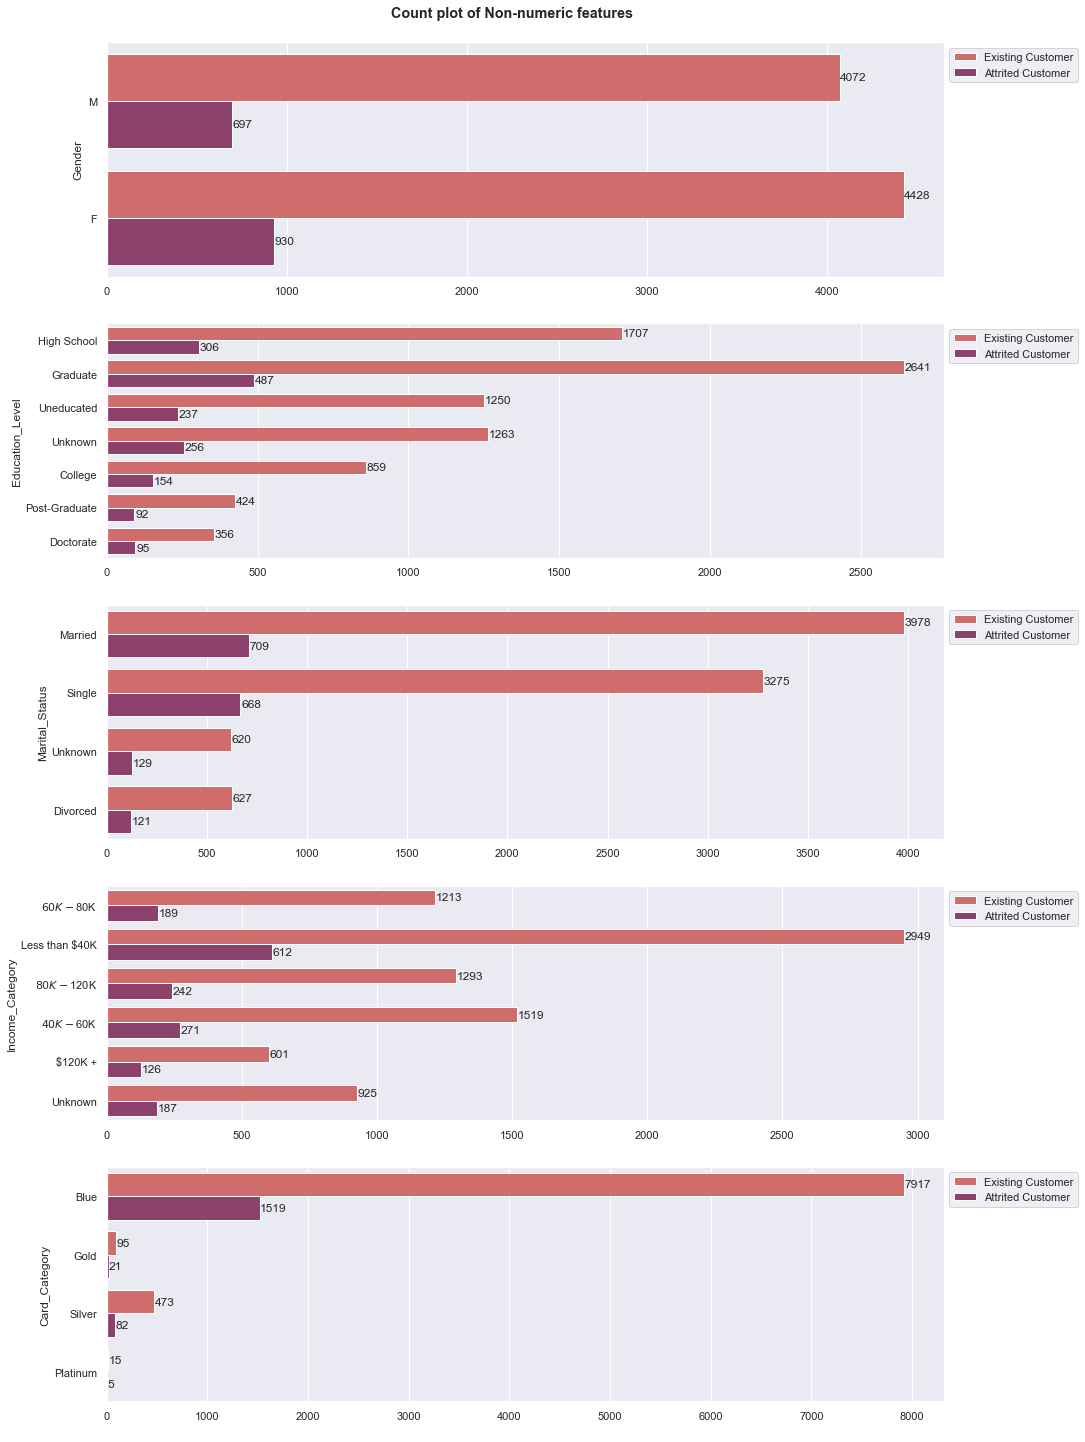

In [15]:
sns.set_theme(style="darkgrid")
fig,axs=plt.subplots(5,1,figsize=(15,25))
i=0
fig.suptitle("Count plot of Non-numeric features",y=0.9,fontweight="bold")
for col in col_non_num:
    b=sns.countplot(data=data,y=col,ax=axs[i],hue="Attrition_Flag",palette="flare")
    b.set_xlabel(" ")
    b.legend(labels=["Existing Customer","Attrited Customer"],loc = 2, bbox_to_anchor = (1,1))
    for p in b.patches:
        height = p.get_height() 
        width = p.get_width()
        axs[i].text(x = width+3,
                y = p.get_y()+(height/2),
                s = "{:.0f}".format(width),
                va = "center")
    i+=1

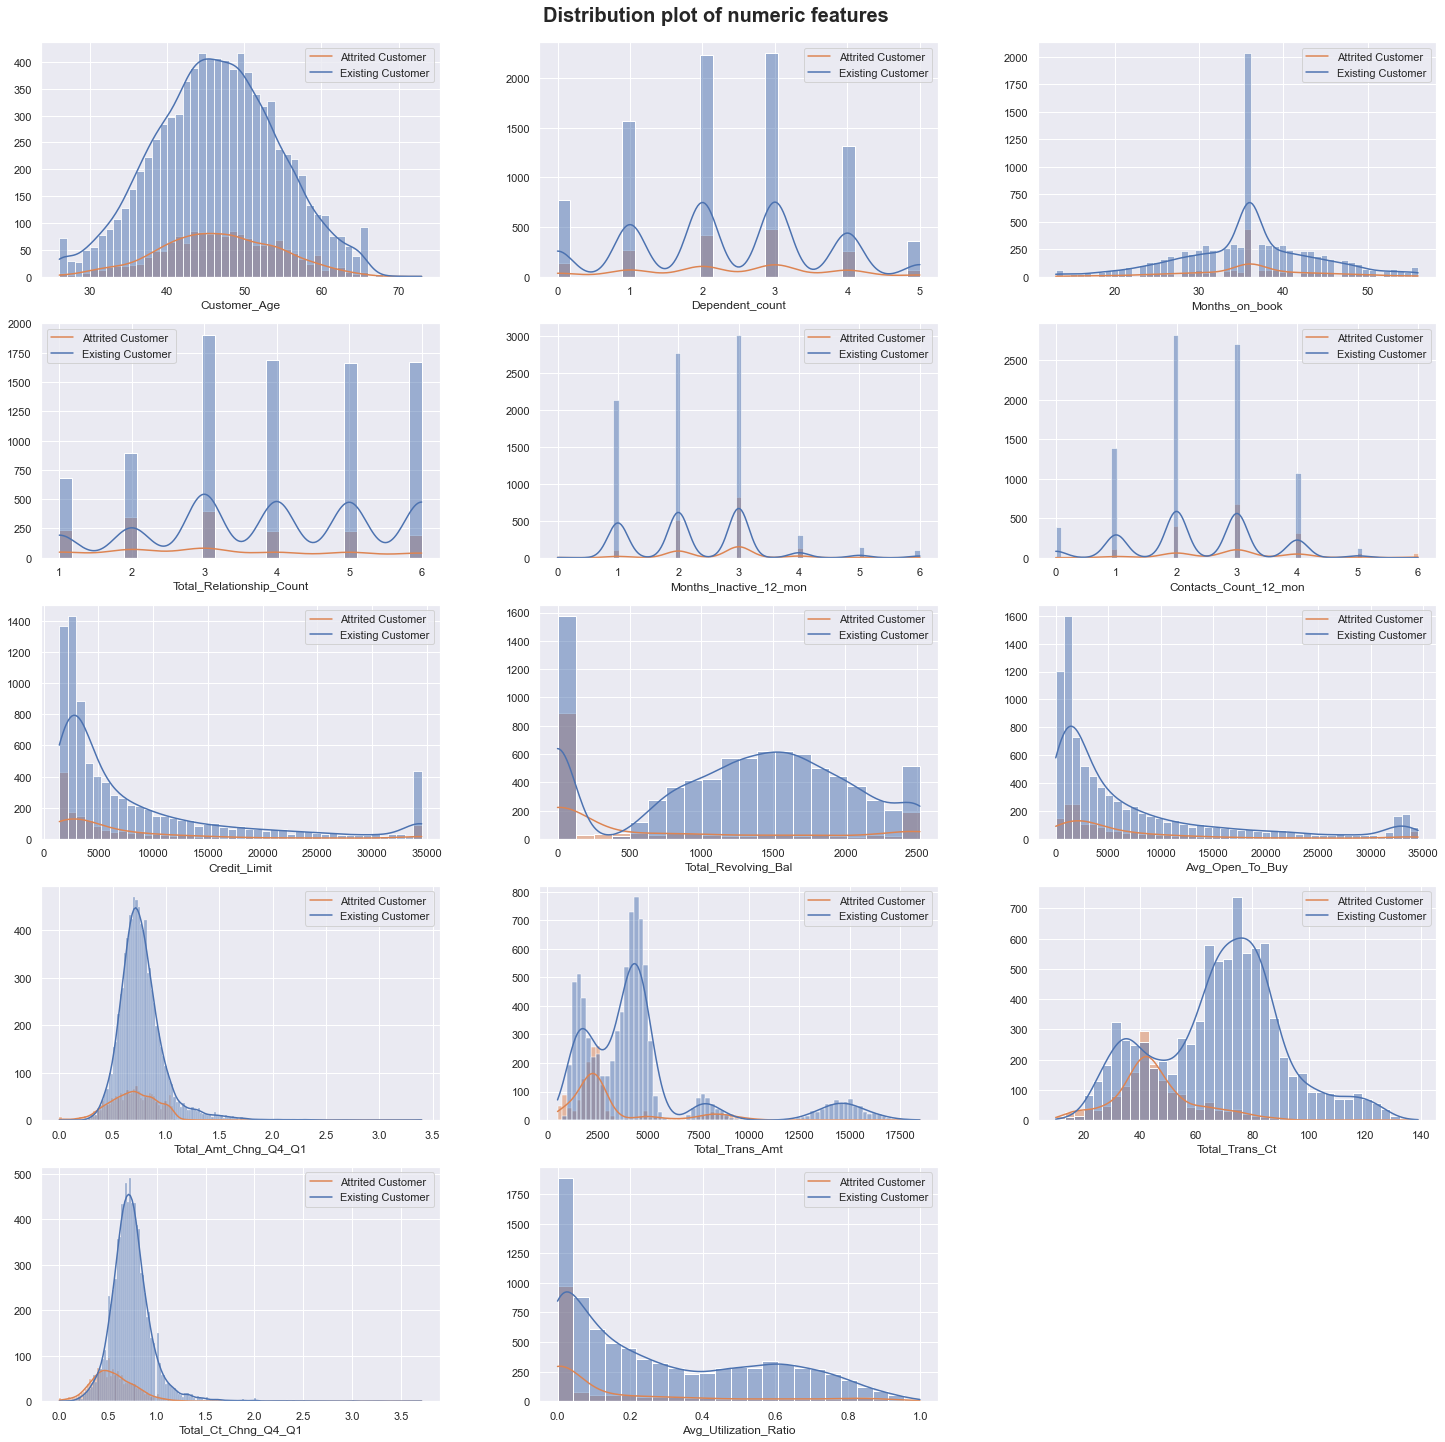

In [16]:
fig,axs=plt.subplots(5,3,figsize=(25,25))
fig.suptitle("Distribution plot of numeric features",y=0.9,fontweight="bold",fontsize=20)
for col,ax in zip(col_num[1:],axs.flatten()):
    b=sns.histplot(x=col,ax=ax,color="lightcoral",data=data,hue="Attrition_Flag",kde=True)
    b.legend(labels=["Attrited Customer","Existing Customer"])
    b.set_ylabel("")
    plt.subplots_adjust(wspace=.25)
fig.delaxes(axs[4,2])

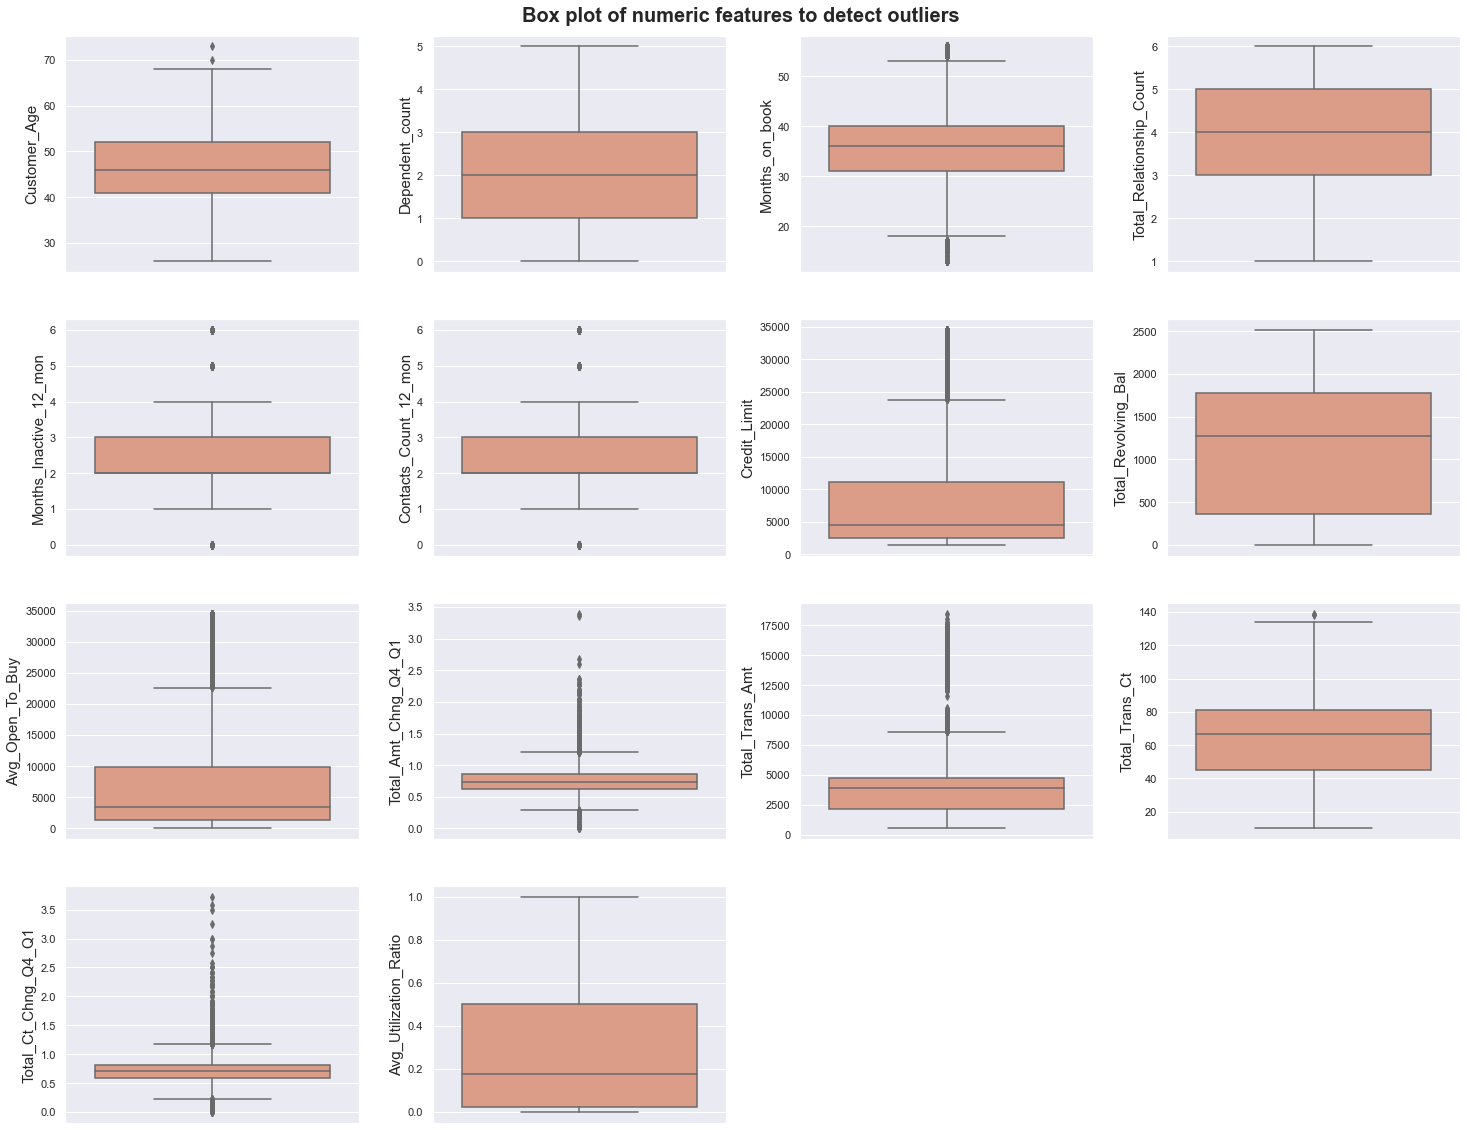

In [17]:
fig,axs=plt.subplots(4,4,figsize=(25,20))
fig.suptitle("Box plot of numeric features to detect outliers",y=0.9,fontweight="bold",fontsize=20)
for col,ax in zip(col_num[1:],axs.flatten()):
    b=sns.boxplot(y=data[col],ax=ax,color="darksalmon")
    b.set_ylabel(col,fontsize=15)
    plt.subplots_adjust(wspace=.25)
fig.delaxes(axs[3,2])
fig.delaxes(axs[3,3])

In [18]:
col_outliers=data[col_num].iloc[:,[1,3,5,6,7,9,10,11,12,13]].columns.tolist()
col_outliers

['Customer_Age',
 'Months_on_book',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [19]:
#detecting columns with outliers and replacing data with outliers with np.nan
def outlier_trt(data,col):
    X=data[col].copy()
    q3=X.quantile(0.75)
    q1=X.quantile(0.25)
    iqr=q3-q1
    for idx,entry in enumerate(data[col]):
        if (entry>q3+1.5*iqr):
            data.loc[idx,col]=q3+1.5*iqr
        elif (entry<q1-1.5*iqr):
            data.loc[idx,col]=q1-1.5*iqr
    return X[(X>q3+1.5*iqr)|(X<q1-1.5*iqr)]
col_outliers=data[col_num].iloc[:,[1,3,5,6,7,9,10,11,12,13]].columns.tolist() #
for col in col_outliers:
    outlier_trt(data,col)


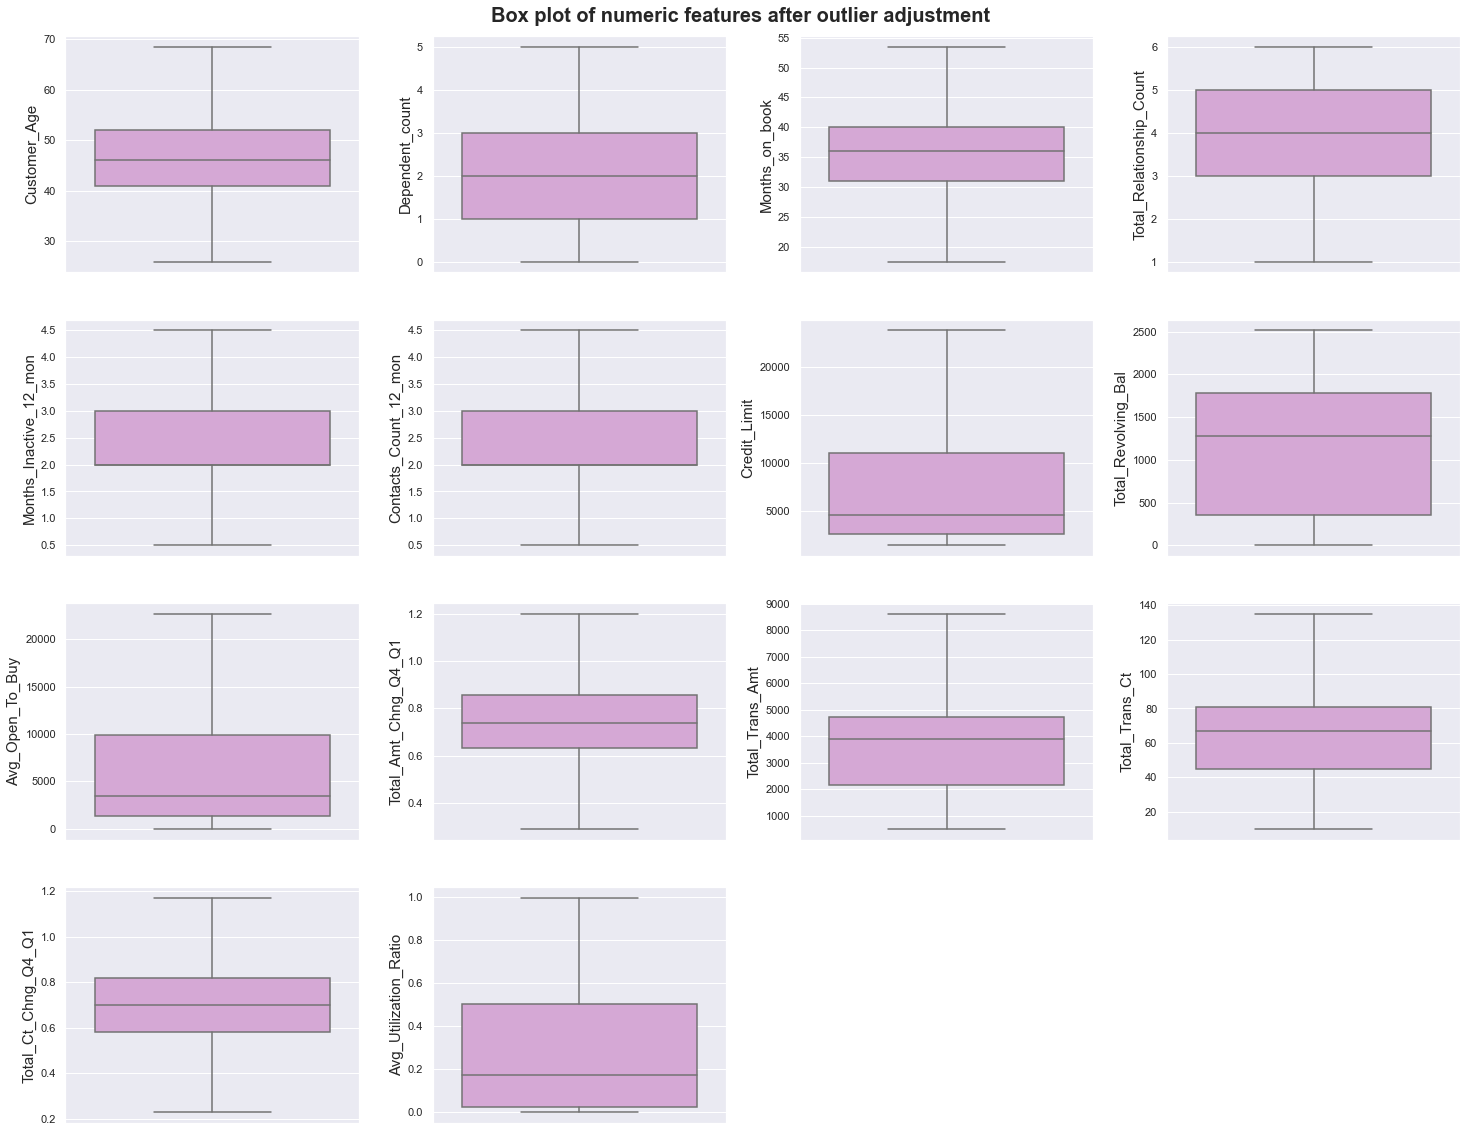

In [20]:
fig,axs=plt.subplots(4,4,figsize=(25,20))
fig.suptitle("Box plot of numeric features after outlier adjustment",y=0.9,fontweight="bold",fontsize=20)
for col,ax in zip(col_num[1:],axs.flatten()):
    b=sns.boxplot(y=data[col],ax=ax,color="plum")
    b.set_ylabel(col,fontsize=15)
    plt.subplots_adjust(wspace=.25)
fig.delaxes(axs[3,2])
fig.delaxes(axs[3,3])

In [21]:
col_num.remove('Attrition_Flag')

#  Data preprocessing and Model selection

In [23]:
x=data.copy()
y=x.pop("Attrition_Flag")
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=1-train_ratio)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,random_state=0,test_size=test_ratio/(test_ratio + validation_ratio))
train_list=[x_train,y_train]
val_list=[x_val,y_val]
test_list=[x_test,x_val]
print("Training set: ",x_train.shape,"\nValidation set: ",x_val.shape,"\nTesting set shape: ",x_test.shape)

Training set:  (7595, 19) 
Validation set:  (1519, 19) 
Testing set shape:  (1013, 19)


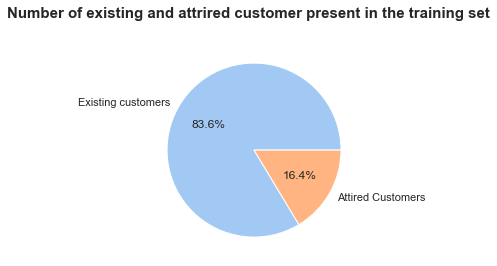

In [24]:
fig,ax=plt.subplots(1,1)
plt.pie(x=y_train.value_counts(),labels=["Existing customers","Attired Customers"],colors=sns.color_palette('pastel'),autopct="%.1f%%")
fig.suptitle("Number of existing and attrired customer present in the training set",y=1,fontweight="bold",fontsize=15)
plt.show()

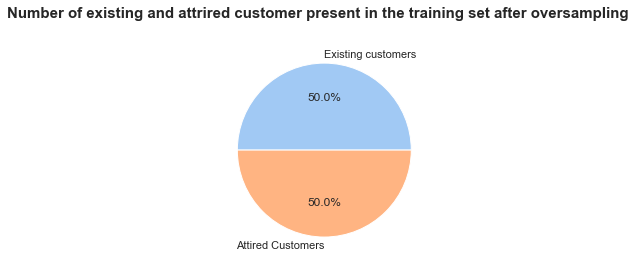

Shape of new training, validation and testing set is as follows: 
Training set:  (12704, 19) 
Validation set:  (1519, 19) 
Testing set shape:  (1013, 19)


In [25]:
obj_lst=x.columns[x.dtypes=="object"].tolist()
lst=x.columns.tolist()
cat_idx=[i for i,ele in enumerate(lst) if ele in obj_lst]
smotenc=SMOTENC(cat_idx,random_state=1,sampling_strategy='not majority')
x_train,y_train=smotenc.fit_resample(x_train,y_train)
fig,ax=plt.subplots(1,1,figsize=(7,4))
fig.suptitle("Number of existing and attrired customer present in the training set after oversampling",y=1,fontweight="bold",fontsize=15)
ax.set_xticks([0,1])
plt.pie(x=y_train.value_counts(),labels=["Existing customers","Attired Customers"],colors=sns.color_palette('pastel'),autopct="%.1f%%")
plt.show()
print("Shape of new training, validation and testing set is as follows: ")
print("Training set: ",x_train.shape,"\nValidation set: ",x_val.shape,"\nTesting set shape: ",x_test.shape)

Report for  RandomForestClassifier(random_state=0)
Accuracy Score : 95.26%
Precision Score : 84.91%
Recall Score : 84.19%
F1 Score : 84.55%


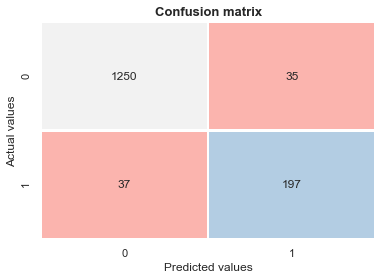



Report for  AdaBoostClassifier(random_state=0)
Accuracy Score : 94.67%
Precision Score : 79.31%
Recall Score : 88.46%
F1 Score : 83.64%


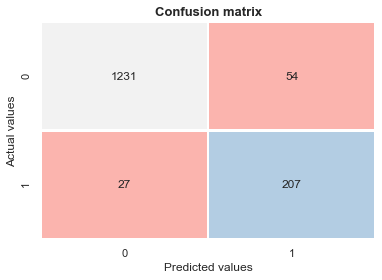



Report for  GradientBoostingClassifier(random_state=0)
Accuracy Score : 96.45%
Precision Score : 87.19%
Recall Score : 90.17%
F1 Score : 88.66%


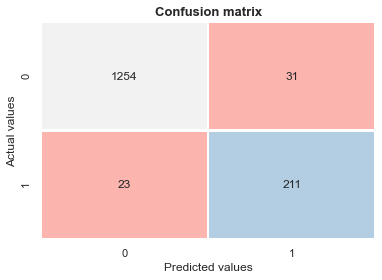

In [26]:
num_transformer=StandardScaler()
cat_transformer=OneHotEncoder(handle_unknown='ignore',sparse=False)
preprocessor=ColumnTransformer(
    transformers=[
        ("num",num_transformer,col_num),
        ("cat",cat_transformer,col_non_num)
    ],
        remainder="passthrough")
rfc=RandomForestClassifier(random_state=0)
ada=AdaBoostClassifier(random_state=0)
gbc=GradientBoostingClassifier(random_state=0)
models=[rfc,ada,gbc]
for model in models:
    my_pipeline=Pipeline(steps=[
                                   ("preprocessor",preprocessor),
                                   ("model",model)
                               ])
    my_pipeline.fit(x_train,y_train)
    preds=my_pipeline.predict(x_val)
    print("Report for ",str(model))
    print('Accuracy Score : {0:.2f}%'.format(accuracy_score(y_val,preds)*100))
    print('Precision Score : {0:.2f}%'.format(precision_score(y_val,preds)*100))
    print('Recall Score : {0:.2f}%'.format(recall_score(y_val,preds)*100))
    print('F1 Score : {0:.2f}%'.format(f1_score(y_val,preds)*100))
    cm=confusion_matrix(y_val,preds)
    b=sns.heatmap(cm, annot=True,fmt="",cbar=False,linecolor="white",linewidths=1.5,cmap="Pastel1")
    b.set(xlabel="Predicted values",ylabel="Actual values")
    b.set_title("Confusion matrix",fontweight="bold",fontsize=13)
    plt.show()
    print("\n")

#  Model Tuning

In [28]:
space = {
        "loss": hp.choice('loss', ["deviance", "exponential"]),
        'learning_rate': hp.choice('learning_rate', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]),
        'subsample': hp.uniform('subsample', 0,1),
        'criterion': hp.choice('criterion', ["friedman_mse", "mse", "mae"]),
        'min_samples_leaf': hp.choice('min_samples_leaf',[0.1,0.2,0.3,0.4,0.5,1,2,3,4]),
        'min_samples_split' : hp.choice('min_samples_split',[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4]),
        'n_estimators' : hp.choice('n_estimators', [10,50,100,150,200]),
        "max_features" : hp.choice("max_features", ["auto", "sqrt", "log2"])
        }
def objective(space):
    model = GradientBoostingClassifier(
                                   loss = space["loss"],
                                   learning_rate = space['learning_rate'], 
                                   subsample = space['subsample'],
                                   criterion = space['criterion'],
                                   min_samples_leaf = space['min_samples_leaf'],
                                   min_samples_split = space['min_samples_split'],
                                   n_estimators = space['n_estimators'],
                                   max_features = space['max_features'],
                                   random_state=0
                                      )
    my_pipeline=Pipeline(steps=[
                               ("preprocessor",preprocessor),
                               ("model",model)
                               ])
    my_pipeline.fit(x_train,y_train)
    accuracy =my_pipeline.score(x_val,y_val)
    return {'loss': -accuracy, 'status': STATUS_OK }
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 25,
            trials= trials)
best

  4%|▍         | 1/25 [00:00<00:04,  4.95trial/s, best loss: -0.15404871626069783]

E:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "



 12%|█▏        | 3/25 [00:04<00:32,  1.46s/trial, best loss: -0.8782093482554312] 

E:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "



 36%|███▌      | 9/25 [00:17<00:19,  1.22s/trial, best loss: -0.9328505595786701]

E:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "



 52%|█████▏    | 13/25 [00:18<00:06,  1.73trial/s, best loss: -0.9684002633311389]

E:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "



 64%|██████▍   | 16/25 [00:20<00:04,  2.00trial/s, best loss: -0.9684002633311389]

E:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "

E:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "



 76%|███████▌  | 19/25 [00:21<00:02,  2.41trial/s, best loss: -0.9684002633311389]

E:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "



 84%|████████▍ | 21/25 [01:01<00:33,  8.35s/trial, best loss: -0.9684002633311389]

E:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "



 88%|████████▊ | 22/25 [03:10<01:45, 35.17s/trial, best loss: -0.9684002633311389]

E:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "



 96%|█████████▌| 24/25 [03:43<00:25, 25.79s/trial, best loss: -0.9684002633311389]

E:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "



100%|██████████| 25/25 [04:12<00:00, 10.11s/trial, best loss: -0.9684002633311389]


{'criterion': 0,
 'learning_rate': 2,
 'loss': 0,
 'max_features': 1,
 'min_samples_leaf': 8,
 'min_samples_split': 0,
 'n_estimators': 4,
 'subsample': 0.5397785093872397}

#  Prediction of test data
Tuned model is used to make predictions on test data.

Accuracy Score : 96.35%
Precision Score : 87.42%
Recall Score : 88.00%
F1 Score : 87.71%


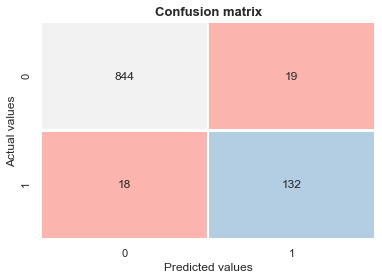

In [29]:
parameters=["loss","learning_rate","criterion","min_samples_leaf","min_samples_split","n_estimators","max_features"]
lst_in_lst=[["deviance", "exponential"],
            [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            ["friedman_mse", "mse", "mae"],
            [0.1,0.2,0.3,0.4,0.5,1,2,3,4],
            [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4],
            [10,50,100,150,200],
            ["auto", "sqrt", "log2"]]
dct={}
for param,lst in zip(parameters,lst_in_lst):
    i=0
    dct2={}
    for ele in lst:
        dct2[i]=ele
        i+=1
    dct[param]=dct2
model =GradientBoostingClassifier(
                                  loss = dct["loss"][best["loss"]],
                                  learning_rate = dct["learning_rate"][best["learning_rate"]],
                                  subsample=best["subsample"],
                                  criterion = dct["criterion"][best["criterion"]], 
                                  min_samples_leaf = dct["min_samples_leaf"][best["min_samples_leaf"]], 
                                  min_samples_split = dct["min_samples_split"][best["min_samples_split"]], 
                                  n_estimators = dct["n_estimators"][best["n_estimators"]], 
                                  max_features = dct["max_features"][best["max_features"]],
                                  random_state=0
                                 )
my_pipeline=Pipeline(steps=[
                               ("preprocessor",preprocessor),
                               ("model",model)
                           ])
my_pipeline.fit(x_train,y_train)
y_pred= my_pipeline.predict(x_test)
print('Accuracy Score : {0:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
print('Precision Score : {0:.2f}%'.format(precision_score(y_test,y_pred)*100))
print('Recall Score : {0:.2f}%'.format(recall_score(y_test,y_pred)*100))
print('F1 Score : {0:.2f}%'.format(f1_score(y_test,y_pred)*100))
cm=confusion_matrix(y_test,y_pred)
b=sns.heatmap(cm, annot=True,fmt="",cbar=False,linecolor="white",linewidths=1.5,cmap="Pastel1")
b.set(xlabel="Predicted values",ylabel="Actual values")
b.set_title("Confusion matrix",fontweight="bold",fontsize=13)
plt.show()

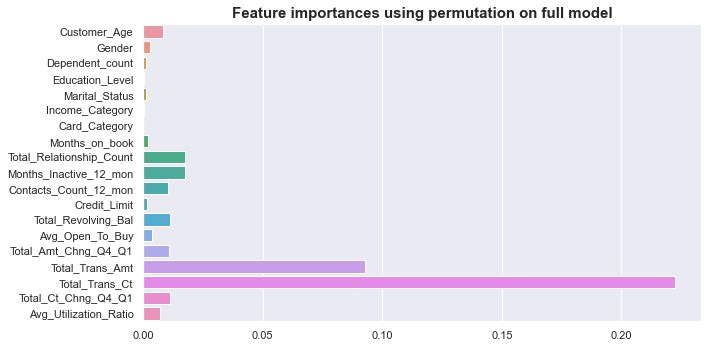

Feature importance scores of each feature sorted in ascending order: 


Total_Trans_Ct              0.222284
Total_Trans_Amt             0.093002
Total_Relationship_Count    0.017648
Months_Inactive_12_mon      0.017483
Total_Ct_Chng_Q4_Q1         0.011445
Total_Revolving_Bal         0.011201
Total_Amt_Chng_Q4_Q1        0.010831
Contacts_Count_12_mon       0.010477
Customer_Age                0.008186
Avg_Utilization_Ratio       0.006919
Avg_Open_To_Buy             0.003645
Gender                      0.002810
Months_on_book              0.001968
Credit_Limit                0.001881
Marital_Status              0.001267
Dependent_count             0.001189
Income_Category             0.000614
Education_Level             0.000433
Card_Category               0.000079
dtype: float64

In [30]:
result = permutation_importance(my_pipeline,x_train,y_train,n_repeats=10,random_state=42,n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=x_train.columns.tolist())
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=forest_importances,y=forest_importances.index)
ax.set_title("Feature importances using permutation on full model",fontweight="bold",fontsize=15)
ax.set_ylabel("")
fig.tight_layout()
plt.show()
print("Feature importance scores of each feature sorted in ascending order: ")
forest_importances.sort_values(ascending=False)

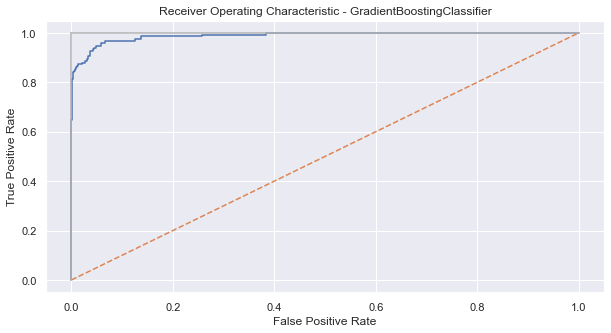

roc_auc_score for GradientBoostingClassifier:  0.9886983391270762


In [31]:
y_score=my_pipeline.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, threshold =roc_curve(y_test,y_score)
plt.subplots(1, figsize=(10,5))
plt.title('Receiver Operating Characteristic - GradientBoostingClassifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7") 
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score for GradientBoostingClassifier: ',roc_auc_score(y_test, y_score))